### 0. Import libraries and preprocess data

In [1]:
import json
import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

sns.set()


#### 0.1. Preprocess embeddings generated for sections

In [2]:
with open("./data/flyers_embeddings.json") as file:
    pdf_data = dict(json.load(file))

In [3]:
doc_index_per_section = []
headers_per_section = []
embeddings_per_section = []

for file_index, headers_sections in enumerate(pdf_data.values()):
    for header, section in headers_sections.items():
        doc_index_per_section.append(file_index)
        headers_per_section.append(headers_per_section)
        embeddings_per_section.append(section)

In [4]:
scaler = StandardScaler()
scaled_section_embeddings = scaler.fit_transform(embeddings_per_section)

#### 0.2. Preprocess embeddings generated for docs

In [5]:
with open("./data/pdf_embeddings.json") as file:
    pdf_data = dict(json.load(file))

In [6]:
doc_index = []
embeddings_per_doc = []

for file_index, (file_name, doc_embedding) in enumerate(pdf_data.items()):
    doc_index.append(file_index)
    embeddings_per_doc.append(doc_embedding)

In [7]:
scaler = StandardScaler()
scaled_doc_embeddings = scaler.fit_transform(embeddings_per_doc)

### 1. Plot the first 2 principal components

In [8]:
# https://lvdmaaten.github.io/tsne/ -> the author of t-SNE recommends plotting initially the first 2 components of PCA

def plot_principal_components(embeddings, indices, embeddings_type):
    pca = PCA(n_components=2, whiten=True)
    fitted_pca = pca.fit(embeddings)
    explained_variance = round(fitted_pca.explained_variance_ratio_.sum(), 4)
    print(f"Explained variance: {explained_variance * 100}%")

    reduced_embeddings = fitted_pca.transform(embeddings)
    plot = sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=indices)
    plt.title(f"First 2 principal components of embeddings at {embeddings_type} level")
    plot.legend_.set_title("Doc. no")

    plt.show()

    return reduced_embeddings

Explained variance: 9.28%


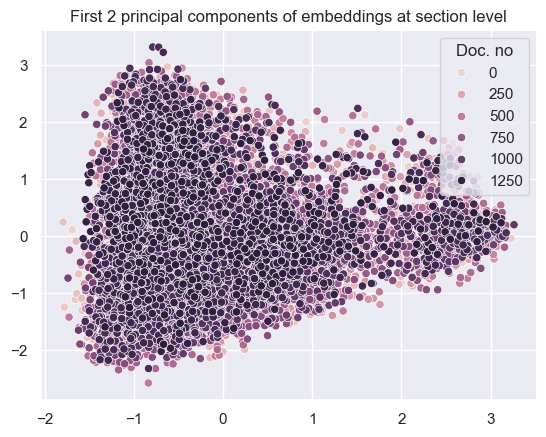

In [9]:
reduced_embeddings = plot_principal_components(scaled_section_embeddings, doc_index_per_section, "section")

Explained variance: 10.4%


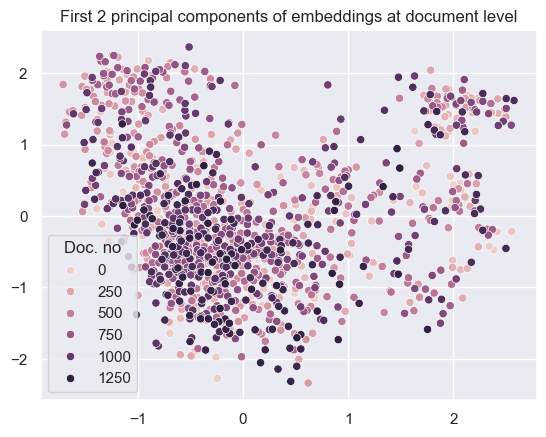

In [10]:
_ = plot_principal_components(scaled_doc_embeddings, doc_index, "document")

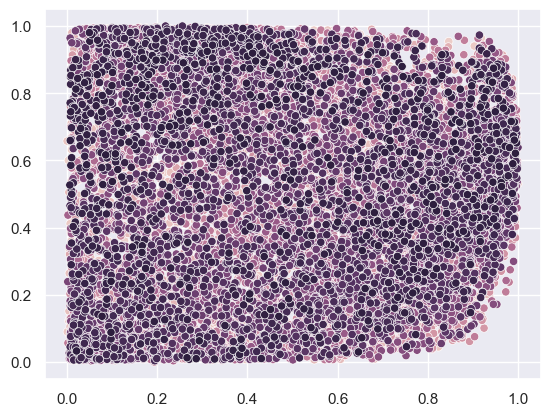

In [15]:
quantile_transformer = QuantileTransformer(n_quantiles=100, random_state=0)
transformed_embeddings = quantile_transformer.fit_transform(reduced_embeddings)
qt_plot = sns.scatterplot(x=transformed_embeddings[:, 0], y=transformed_embeddings[:, 1], hue=doc_index_per_section)
# plt.title("Quantile transformation of the first 2 principal components")
qt_plot.legend().set_visible(False)

plt.show()

### 2. Visualize data using t-SNE

As the perplexity value increases, the clusters of points are more visible. They are noticeable after surpassing a value of ~30. The best separation is observable when using a perplexity of 37.

In [11]:
def plot_tsne(embeddings, indices, embeddings_type, perplexity):
    embeddings_2d = TSNE(n_components=2, perplexity=perplexity, metric="cosine").fit_transform(embeddings)

    plot = sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=indices)
    plt.title(f"t-SNE visualization of embeddings at {embeddings_type} level")
    plot.legend_.set_title("Doc. no")

    plt.show()

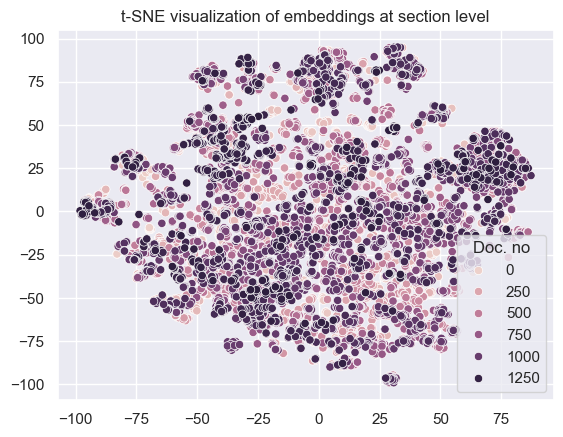

In [12]:
plot_tsne(scaled_section_embeddings, doc_index_per_section, "section", 37)

For embeddings generated at document level, a value of 12 for perplexity gives the best visualization in terms of observable clusters.

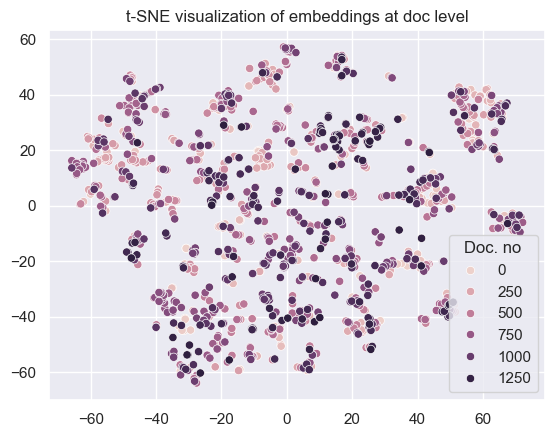

In [13]:
plot_tsne(scaled_doc_embeddings, doc_index, "doc", 12)